### 17회 2번 코로나 시계열
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

# 신규 확진자 예측

[kaggle](https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide)


In [2]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem2.csv'
encoded_url = urllib.parse.quote(url, safe=':/')

response = urllib.request.urlopen(encoded_url, context=context)
df = pd.read_csv(response, encoding='utf-8')
df

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN
...,...,...,...,...,...,...,...
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0
136929,Zimbabwe,2021-11-29,134226.0,4706.0,3067.0,15092171.0,17809.0


In [70]:
df_us = df[df['location'] == 'United States'][['date','new_tests']]
df_us['date'] = pd.to_datetime(df_us.date)
df_us = df_us[df_us['new_tests'] > 0]
# df_us['total_cases'] = np.log(df_us['total_cases'])
df_us = df_us.set_index('date')
df_us = df_us.fillna(0)
df_us

,new_tests
date,
2020-03-01,348.0
2020-03-02,513.0
2020-03-03,617.0
2020-03-04,888.0
2020-03-05,1201.0
...,...
2021-11-23,1119437.0
2021-11-24,1190107.0
2021-11-25,533235.0


In [71]:
print(len(pd.date_range('2020-03-01', '2021-11-27')))
df_us.index

637


DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27'],
              dtype='datetime64[ns]', name='date', length=637, freq=None)

<AxesSubplot:xlabel='date'>

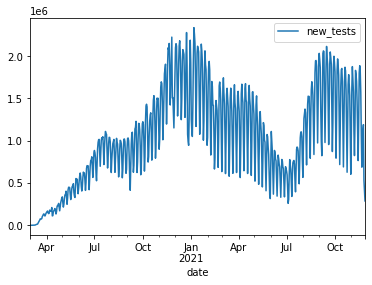

In [72]:
df_us.plot()

In [75]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(df_us[column])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -2.155716
p-value: 0.222709
귀무가설 채택, 단위근 존재 O, 정상성 만족 X



In [74]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(df_us[column].diff()[1:])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -3.279123
p-value: 0.015838
귀무가설 기각, 단위근 존재 X, 정상성을 만족



In [76]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다(정상성을 만족하지 않는다).
# H1 : 단위근이 없다(정상성을 만족한다).
for column in df_us.columns:
    result = adfuller(np.log(df_us[column]).diff()[1:])

    # 단위근 존재
    print(f'{column} ADF-Test')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print('귀무가설 기각, 단위근 존재 X, 정상성을 만족')
    else:
        print('귀무가설 채택, 단위근 존재 O, 정상성 만족 X')
    print()

new_tests ADF-Test
ADF Statistic: -7.620860
p-value: 0.000000
귀무가설 기각, 단위근 존재 X, 정상성을 만족



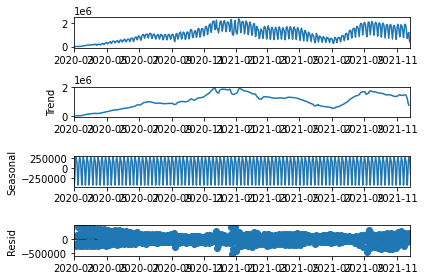

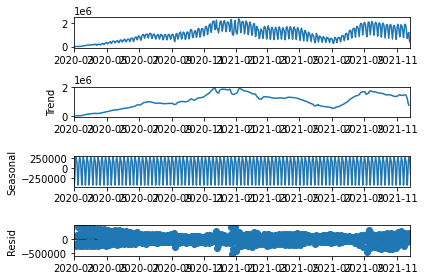

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(df_us, model='additive')

result.plot()

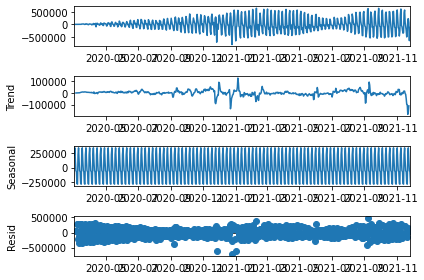

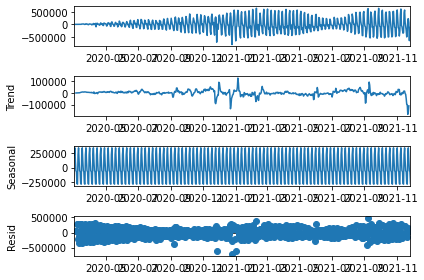

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(df_us.diff()[1:], model='additive')

result.plot()

AR (Auto Regression, 자기회귀)

AR은 시계열상의 과거 관측값을 이용하여 예측모델을 생성하는 방법이다.

즉, 시계열 데이터 자신의 과거 데이터를 통해서 미래를 예측하는 방법이다.

과거 P개의 관측값과 선형결합으로 예측하는 모델을 P차 AR모델이라고 하고 AR(P)라고 표현한다.

* <font color='red'>Auto-Regressive (AR) p = 1</font>: 
    
    $\color{red}{y_t = c + \alpha_1 y_{t-1} + \epsilon_t}$

* <font color='red'>Auto-Regressive (AR) filter (long term)</font>: 
    
    $\color{red}{y_t = c + \alpha_1 y_{t-1} + \dots \alpha_{\color{red}p}y_{t-\color{red}p} + \epsilon_t = c + \sum_{i=1}^p{\alpha_i}y_{t-i} + \epsilon_t}$  -> p

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Figure size 720x432 with 0 Axes>

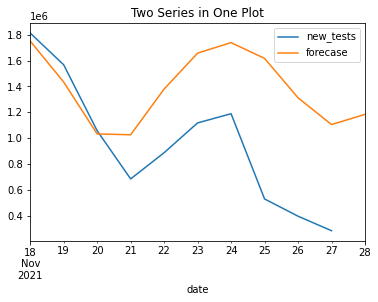

2021-11-18    3.827576e+09
2021-11-19    1.763433e+10
2021-11-20    5.995927e+08
2021-11-21    1.157912e+11
2021-11-22    2.408736e+11
2021-11-23    2.889660e+11
2021-11-24    3.002551e+11
2021-11-25    1.173334e+12
2021-11-26    8.327108e+11
2021-11-27    6.693297e+11
2021-11-28             NaN
dtype: float64

In [110]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

train = df_us[:len(df_us) - 10]
test = df_us[len(df_us)-10:]

lag = [1,2,3,4,5]  # AR 모델의 라그 (지연) 값. 이 값을 조정하여 최적의 라그 값을 찾을 수 있습니다.
model = AutoReg(train, lags=lag)
model_fit = model.fit()

# # 예측
start = len(train)
end = start + 10  # 10개의 미래 값 예측
forecast = model_fit.predict(start=start, end=end)

plt.figure(figsize=(10, 6))
test.plot(label='true', legend=True)
forecast.plot(label='forecase', legend=True)
plt.title("Two Series in One Plot")
plt.show()

((test['new_tests'] - forecast) ** 2)

MA (Moving Average, 이동평균)

MA는 과거 예측 오차를 기반하여 예측하는 것이다.

과거 q개의 예측오차의 선형결합으로 예측하는 모델을 q차 MA모델이라 하고 MA(q)라고 표현한다.

* <font color='red'>Moving Average (MA) filter (short term)</font>:

    $\color{red}{y_t = c + \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q} = c + \epsilon_t + \sum_{i=1}^q{\beta_i}\epsilon_{t-i}} $  -> q

AR(p) = MA(∞)

[reference](https://otexts.com/fppkr/MA.html)

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Figure size 720x432 with 0 Axes>

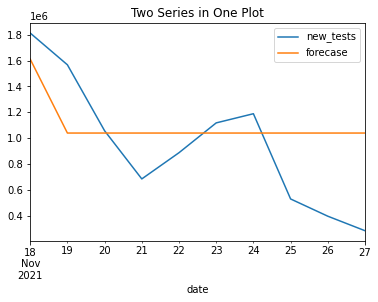

date
2021-11-18    4.047559e+10
2021-11-19    2.765848e+11
2021-11-20    3.100878e+08
2021-11-21    1.250299e+11
2021-11-22    2.296094e+10
2021-11-23    6.115914e+09
2021-11-24    2.216356e+10
2021-11-25    2.580617e+11
2021-11-26    4.107652e+11
2021-11-27    5.666712e+11
dtype: float64

In [111]:
from statsmodels.tsa.arima.model import ARIMA

# MA 모델 구축
# order는 (p, d, q) 형태로 지정되며, 여기서 p는 AR 차수, d는 차분 차수, q는 MA 차수
model = ARIMA(train, order=(0, 0, 1))  # 여기서는 MA(1) 모델을 사용
model_fit = model.fit()

# 예측 수행
forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10, 6))
test.plot(label='true', legend=True)
forecast.plot(label='forecase', legend=True)
plt.title("Two Series in One Plot")
plt.show()

((test['new_tests'] - forecast) ** 2)

In [112]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_tests   No. Observations:                  627
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -8881.661
Date:                Sun, 20 Aug 2023   AIC                          17769.321
Time:                        15:45:13   BIC                          17782.644
Sample:                    03-01-2020   HQIC                         17774.497
                         - 11-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.041e+06   4.72e+04     22.058      0.000    9.49e+05    1.13e+06
ma.L1          0.9409      0.022     43.206      0.000       0.898       0.984
sigma2      1.892e+11      0.017   1.09e+13      0.000    1.89e+11    1.89e+11
===================================================================================
Ljung-Box (L1) (Q):                 313.39   Jarque-Bera (JB):                20.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.30
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.11e+28. Standard errors may be unstable.
"""

### acf, pacf

[ACF(Auto Correlation Function)](https://datalabbit.tistory.com/112)

시차에 따른 일련의 자기상관을 자기상관함수(ACF)라고 한다.
ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며, 시차가 커질수록 ACF는 점차 0에 가까워진다.(시차가 멀어질수록 당연히 상관관계는 떨어지게 된다. 물론 seasonal한 데이터의 겨우 특정주기에 따라 다시 튀어오르는 구간이 있다.)
ACF는 시계열의 정상성을 평가할 때 유용하다.
- 정상 시계열의 경우 ACF는 상대적으로 빨리 0(상관관계가 0)으로 접근한다.
- 비정상 시계열의 경우 ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.
- 
[PACF(Partial Auto Correlation Function)](https://datalabbit.tistory.com/113)

시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타낸다.
즉, t시점과 t-1의 연관성, 그리고 t와 t-2의 연관성(이때 t-1와의 연관성은 제외한다. 순수하게 특정 시점간의 연관성(correlation)만 생각하고 사이에 있는 시점들의 연관성은 제외한다.)
시차에 따른 일련의 편자기 상관을 편자기 상관함수(PACF)라고 한다.


![images-sjina0722-post-e8fc0b78-cc11-4dab-b6c8-fa60021e4552-image](https://github.com/Ssunbell/ADP_study/assets/97590480/132690f4-1528-44ea-9676-ba6690624513)

acf, pcaf 그래프를 보고 이 시계열 데이터가 AR의 성질을 띄는지 or MA의 성질을 띄는지 or 둘다를 가지고 있는지 판단.


VAR (벡터 자기 회귀 모형)
Vector Atuo Regression 모델은 종속변수가 1개가 아닌 여러 개일 경우에 사용합니다. 예를 들어 위의 에시에서 신규 확진자수와 신규 백신 수를 예측할 때 사용합니다.
